### Reading all AOT40 Data from all locations
##### This code can be used to extract and then convert data to different format.

In [56]:
import glob
import numpy as np
import datetime
import julian


# Defining some lists that will be later used to store data in the loop


latl,longl,landcoverl,allvalues,alldates = [],[],[],[],[]


# Creates a list of AOT40 files to be read. Please change this file path to where data is stored

x =glob.glob("D:/AOT/*.txt")


# Loops over list of foles opening each one and reading/saving content to arrays and lists


for item in x:
    
    # Creates two lists that will be used to create a 2-D list containing all values of AOT40
    # Constructed this way to give easy long/lat reference to data 
    
    locationvalues,timevalues= [],[]
    
    # Text file opened and read.
    
    f=open(item, "r")
    content = f.readlines()
    
    # Finds the index (Row number) of where the AOT40 data begins 
    
    indexx = content.index('#time;aot40\n')

    # Hard coded row numbers for relevant infomation. Always the same in all files.
    
    longindex = 13
    latindex = 14
    landcoverindex = 33

    # The data has some weird stuff around it. This strips the stuff and saves what is needed.
    # Data is then appended to lists

    long,lat,landcover = content[longindex].split(':',1)[1],content[latindex].split(':',1)[1],content[landcoverindex].split(':',1)[1]
    long,lat,landcover = long.split('\n',1)[0],lat.split('\n',1)[0],landcover.split(',',1)[0]
    longl.append(long),latl.append(lat),landcoverl.append(landcover)
    
    
    

    # The following loop will read all of the dates and values for AOT40.
    # The default saves the standard python datetime values to lists but code is included to save Julian.
    # Any rubbish around the actual values is stripped and the values saved to a 2-D list. 
   
    for item in content[indexx+1:]:
        Name = item.split(' ',1)
        fmt = '%Y-%m-%d'
        s= Name[0]
        dt = datetime.datetime.strptime(s, fmt)
        jd = julian.to_jd(dt + datetime.timedelta(hours=12), fmt='jd')#
        
        # To save to Julian replace dt with jd
        
        timevalues.append(dt)
        Name2 = Name[1].split(';',1)[1]
        locationvalues.append(float(Name2.split('\n',1)[0]))
    alldates.append(timevalues) 
    allvalues.append(locationvalues)
    f.close()

### Plotting all AOT40 data as a histogram and then normal dist

Pick a dataset45


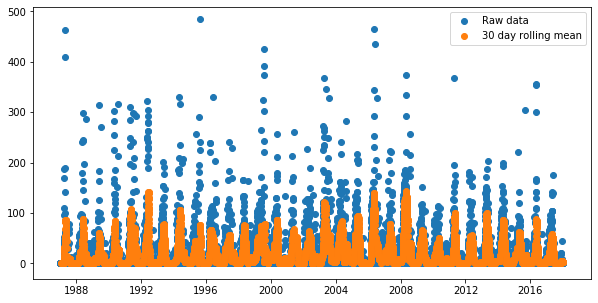

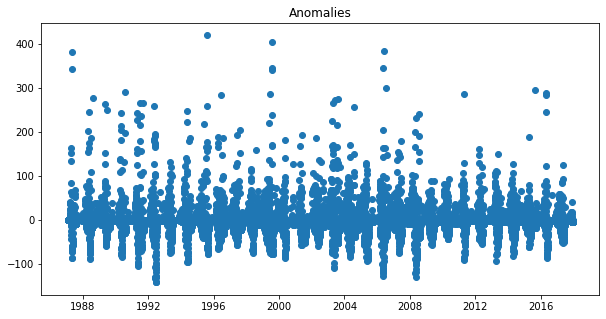

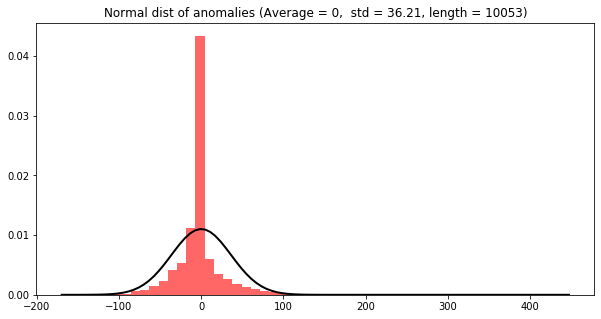

In [65]:
'''

The following code does not really need to be explained.

It takes the users choice of data (0-50) and then removes and false data,

normally labelled as -999. It then removes them. (Not the best efficiency).

It plots a few differetn graphs for analysis and then plots a guassian dist of the anomaly data

'''




from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

x = int(input('Pick a dataset'))
allvaluesarr = np.array(allvalues[x])
alldatesarr = np.array(alldates[x])
allvaluesarr[allvaluesarr==-999]=np.nan

newlist,newlist2 = [],[]

for oc,(item,item2) in enumerate(zip(allvaluesarr,alldatesarr)):
    if np.isnan(item) == False:
        newlist.append(item)
        newlist2.append(item2)
        
        
allvaluesarr = np.array(newlist)
alldatesarr = np.array(newlist2)


s = pd.Series(allvaluesarr)

rollingmean = s.rolling(30).mean()


fig = plt.figure(figsize= (10,5))

plt.scatter(alldatesarr,allvaluesarr,label = 'Raw data')
plt.scatter(alldatesarr,rollingmean,label = '30 day rolling mean')
plt.ylabel = ('AOT40')
plt.legend(loc='upper right')
plt.xlabel=('time')
plt.show()



rollingmean = np.array(rollingmean)
rollingmean = rollingmean[~np.isnan(rollingmean)]

t = allvaluesarr[(len(allvaluesarr)-len(rollingmean)):] - rollingmean

fig = plt.figure(figsize= (10,5))

plt.scatter(alldatesarr[(len(allvaluesarr)-len(rollingmean)):],t)
plt.title('Anomalies')
plt.show()


fig = plt.figure(figsize= (10,5))
# Fit a normal distribution to the data:
mu, std = norm.fit(t)

# Plot the histogram.
plt.hist(t, bins=50, density=True, alpha=0.6, color='r')


# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Normal dist of anomalies (Average = %.0f,  std = %.2f, length = %.0f)" % (mu, std,len(allvaluesarr))
plt.title(title)
plt.show()


## Plotting Several Guassians

#### This does the same as above, ignoring the histogram and then looping over several files to check the randomness of the AOT40

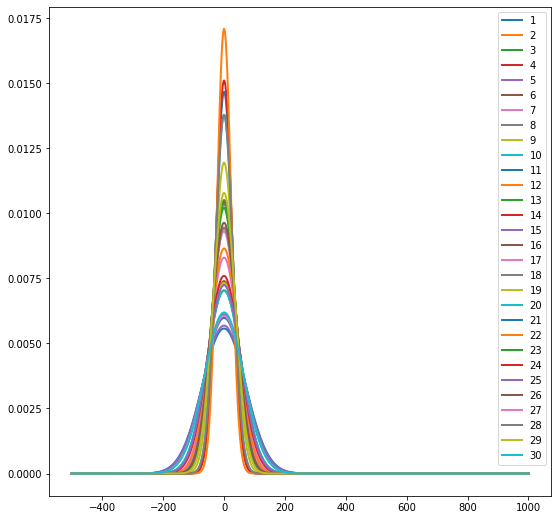

In [49]:
###### Plot the PDF.
fig = plt.figure(figsize= (9,9))

somethings = []
counter = 0
for item,item2 in zip(allvalues[20:50],alldates[20:50]):
    
    counter += 1
    allvaluesarr = np.array(item)
    alldatesarr = np.array(item2)
    allvaluesarr[allvaluesarr==-999]=np.nan

    newlist,newlist2 = [],[]

    for oc,(item,item2) in enumerate(zip(allvaluesarr,alldatesarr)):
        if np.isnan(item) == False:
            newlist.append(item)
            newlist2.append(item2)



    allvaluesarr = np.array(newlist)
    alldatesarr = np.array(newlist2)

    s = pd.Series(allvaluesarr)

    rollingmean = s.rolling(90).mean()
    rollingmean = np.array(rollingmean)
    rollingmean = rollingmean[~np.isnan(rollingmean)]

    t = allvaluesarr[(len(allvaluesarr)-len(rollingmean)):] - rollingmean
    
    
    mu, std = norm.fit(t)

    x = np.linspace(-500,1000,1000)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, linewidth=2,label = counter)
    plt.legend(loc ='upper right')
plt.show()
    
    
    
    
    

### Plotting anomolies 